In [1]:
import numpy as np
import astropy
import math
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
from matplotlib.ticker import AutoMinorLocator
from matplotlib import cm

In [2]:
unit_d = np.load('unit_d.npy')
z_list = np.load('redshift.npy')
a_list = np.load('scale_factor.npy')
red = [4.63, 5.62, 5.98, 6.97, 8, 10, 12.1, 15]

## 1. SFR comparison (CoDa III, LIMFAST, THESAN-1, Hopkins & Beacom (2006)

CoDa III SFR

In [30]:
sfr_coda = np.array([147.14447971862273, 827.0227409699755, 2721.1881111545467, 4740.3680956361, 8124.262314517666, 13506.822592781442, 
                  21122.424288292947, 22120.850289226997, 24265.806819583497, 26011.023325259273, 29874.73214670912, 33391.89969597357])

Corresponding redshift for SFR above

In [31]:
SFR_redshift = [14.998478344882109, 12.105645221544385, 10.024052248966372, 8.998434288482445, 7.99925307907141,6.973056897750455, 
5.987800534715799, 5.844138821309018, 5.622023408267477, 5.413592678226056, 5.0132241061526175, 4.63662412150525]

Importing THESAN-1 and LIMFAST SFR 

In [5]:
TS1_SFR = pd.read_csv('THESAN-1_SFR.csv', header=None, delim_whitespace=True) 
LIMFAST_SFR = pd.read_csv('LIMFAST_SFR.csv', header=None, delim_whitespace=True) 

In [32]:
TS1_SFR_filtered = TS1_SFR[[0, 1]]
# Create lists from the filtered DataFrame
TS1_SFR_r = TS1_SFR_filtered[0].tolist()  
TS1_SFR_i = TS1_SFR_filtered[1].tolist()  # SFR (Second column of csv file)
TS1_SFR_R = [float(value.strip(',')) for value in TS1_SFR_r] #Redshift (Third column of csv file)

LIMFAST_SFR_filtered = LIMFAST_SFR[[0, 1]]
# Create lists from the filtered DataFrame
LIM_SFR_r = LIMFAST_SFR_filtered[0].tolist()  # SFR (Second column of csv file)
LIM_SFR_i = LIMFAST_SFR_filtered[1].tolist()  #Redshift (Third column of csv file)
LIM_SFR_R = [float(value.strip(',')) for value in LIM_SFR_r]

In [33]:
#SFR from Hopkins & Beacome (2006): From the Gong et al.
def GONG_SFRD(z):
    a = 0.0118
    b = 0.08
    c = 3.3
    d = 5.2 
    return (a + b * z) / (1 + (z / c) ** d) / (0.67 ** 3)
gong_redshift = np.arange(4, 15, 0.25)
gong_sfr = []
for i in gong_redshift:
    gong_sfr.append(GONG_SFRD(i))  

## SFR comparison figure

Text(0, 0.5, 'SFR [M_solar/yr/cMpc^3]')

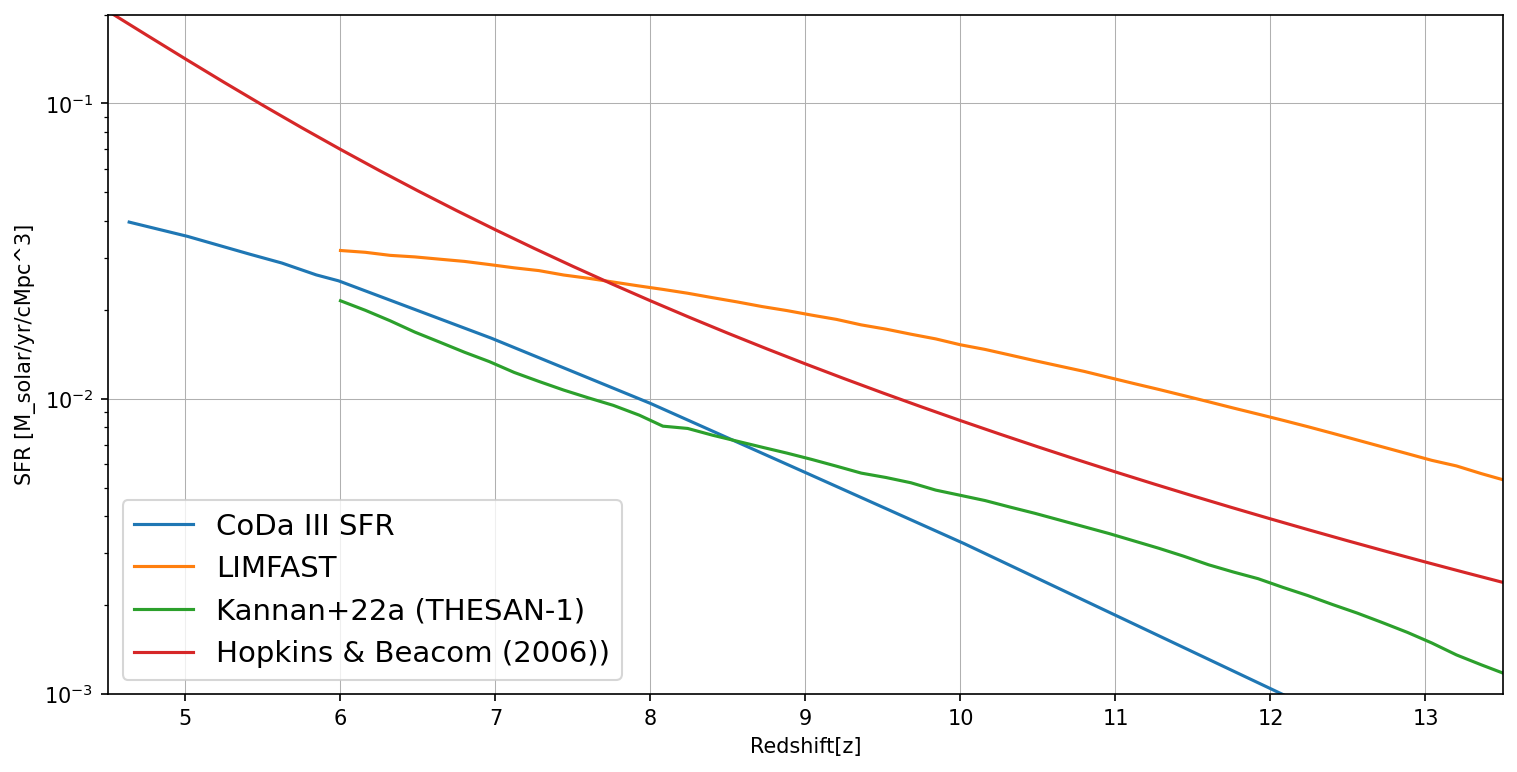

In [34]:
fig=plt.figure(figsize=(12,6),dpi=150)
ax=fig.subplots()
ax.plot(SFR_redshift, sfr_coda/94.43**3, label = 'CoDa III SFR')
ax.plot(LIM_SFR_R, LIM_SFR_i, label = 'LIMFAST')
ax.plot(TS1_SFR_R, TS1_SFR_i, label = 'Kannan+22a (THESAN-1)')
ax.plot(gong_redshift, gong_sfr, label = 'Hopkins & Beacom (2006))')
ax.grid(linewidth=0.5)
ax.set_xlim(4.5, 13.5)
ax.set_ylim(10**-3, 0.2)
ax.legend(fontsize = 14, loc = 'lower left')
ax.set_yscale('log')
ax.set_xlabel('Redshift[z]')
ax.set_ylabel('SFR [M_solar/yr/cMpc^3]') 
#plt.savefig('SFR.jpg', bbox_inches='tight', dpi=500)

## 2. CoDa III SFR / Physical volume of the cube
Purpose of the figure below was to support why we see the decrease in brightness on luminosity density projection animation past z~6 (Since the physical volume is increaing more over time, thus luminosity density (/physical density) decrease at certain point)

In [9]:
physical_volume = [(94.43*3.086e+24*a_list[117])**3,(94.43*3.086e+24*a_list[89])**3, (94.43*3.086e+24*a_list[81])**3,
       (94.43*3.086e+24*a_list[64])**3, (94.43*3.086e+24*a_list[51])**3, (94.43*3.086e+24*a_list[33])**3,
       (94.43*3.086e+24*a_list[22])**3, (94.43*3.086e+24*a_list[13])**3]
coda_sfr = np.array([33391.89969597357,24265.806819583497, 21122.424288292947,13506.822592781442, 8124.262314517666,2721.1881111545467,
                  827.0227409699755, 147.14447971862273 ])

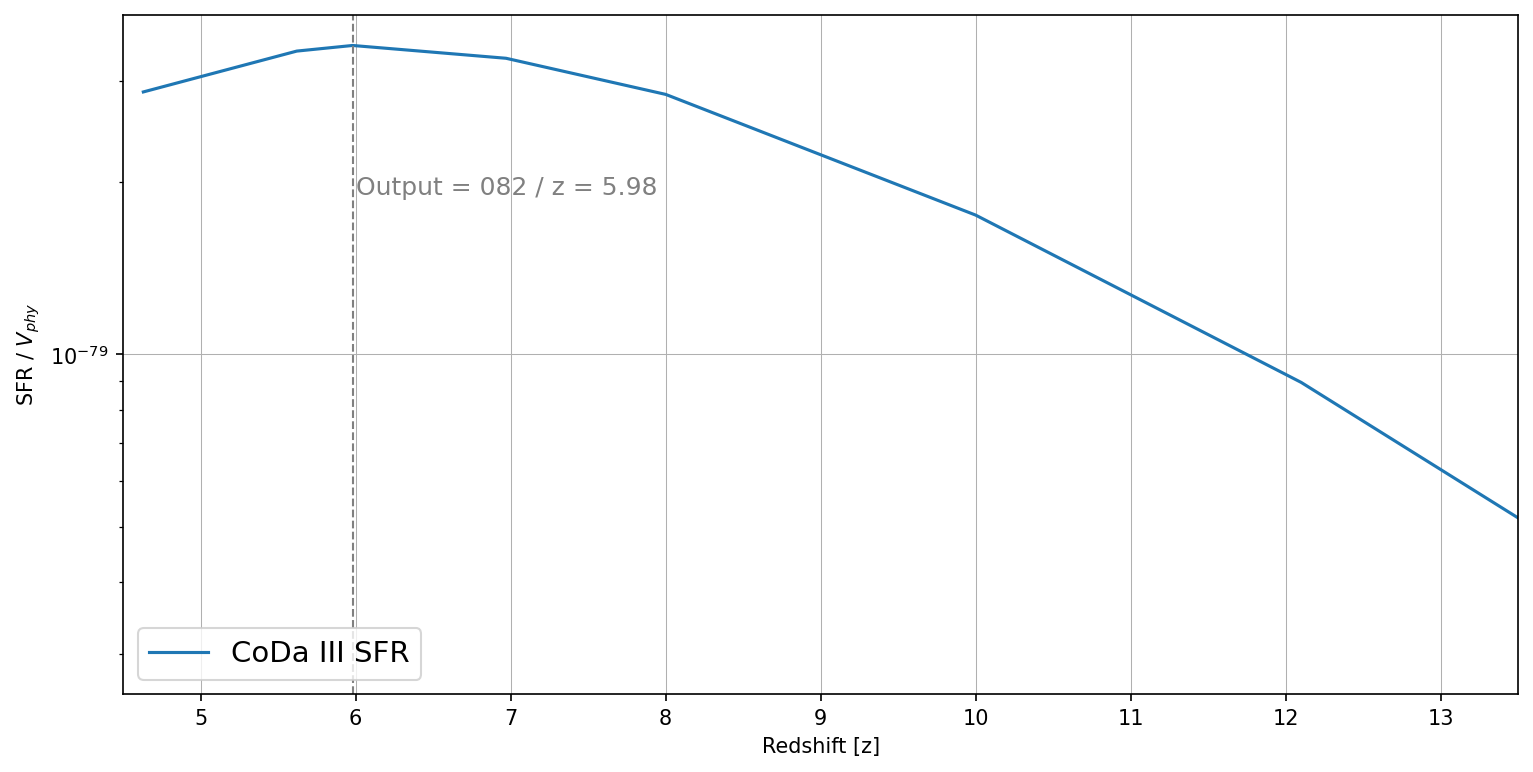

In [10]:
fig=plt.figure(figsize=(12,6),dpi=150)
ax=fig.subplots()
ax.plot(red, coda_sfr/94.43**3/physical_volume, label = 'CoDa III SFR')
ax.grid(linewidth=0.5)
ax.set_xlim(4.5, 13.5)
ax.legend(fontsize = 14, loc = 'lower left')
ax.set_yscale('log')
ax.set_xlabel('Redshift [z]')
ax.set_ylabel('SFR / $V_{phy}}$')
ax.axvline(x=5.98, color='gray', linestyle='--', linewidth=1)
ax.text(6.0, ax.get_ylim()[1] * 0.5, 'Output = 082 / z = 5.98', rotation=0, verticalalignment='center', fontsize=12, color='gray')
plt.show()

## 3.1. $I_{Hα}$ comparison 
1. CoDa III (z = 4.6 - 15)
2. THESAN-1 & II (z = 6 - 13.8)
3. LIMFAST (z = 6 - 13.8)

In [ ]:
RED_FINAL = [4.63, 5.62, 5.98, 6.97, 7.99, 10.02, 12.1, 14.99] #8 redshifts for CoDa III 

I_nu_rec = [14.5343116907842, 8.39312289965076, 6.72891209149687, 3.561077983643, 1.74880576242233, 0.413154235114157, 
           0.0866214927086272, 0.00954705486816644] #CoDa III recombinational I_nu

I_nu_col = [8.76497928121578, 5.07749784801087, 4.15411326160286, 2.30726321399401, 1.19416989555494, 0.317404769493869, 
           0.0737284973508163, 0.00819969790041795] #Coda III collisional I_nu

TOTAL = np.array(I_nu_rec) + np.array(I_nu_col)

In [12]:
TS1 = pd.read_csv('THESAN-1.csv', header=None, delim_whitespace=True)
TS2 = pd.read_csv('THESAN-2.csv', header=None, delim_whitespace=True)
LIM = pd.read_csv('LIMFAST.csv', header=None, delim_whitespace=True)

ts1_filtered = TS1[[0, 1]]
# Create lists from the filtered DataFrame
TS1r = ts1_filtered[0].tolist()  # Second column
TS1i = ts1_filtered[1].tolist()  # Third column
TS1R = [float(value.strip(',')) for value in TS1r]

ts2_filtered = TS2[[0, 1]]

# Create lists from the filtered DataFrame
TS2r = ts2_filtered[0].tolist()  # Second column
TS2i = ts2_filtered[1].tolist()  # Third column
TS2R = [float(value.strip(',')) for value in TS1r]


LIM_filtered = LIM[[0, 1]]
# Create lists from the filtered DataFrame
LIMr = LIM_filtered[0].tolist()  # Second column
LIMi = LIM_filtered[1].tolist()  # Third column
LIMR = [float(value.strip(',')) for value in TS1r]

I_nu at the uniform condition (T = 10,000K, rho = 0.143, Xii = 1)

#uniform = [0.06251, 0.0788, 0.0725, 0.0443, 0.0236, 0.0062, 0.0013, 0.00012] 

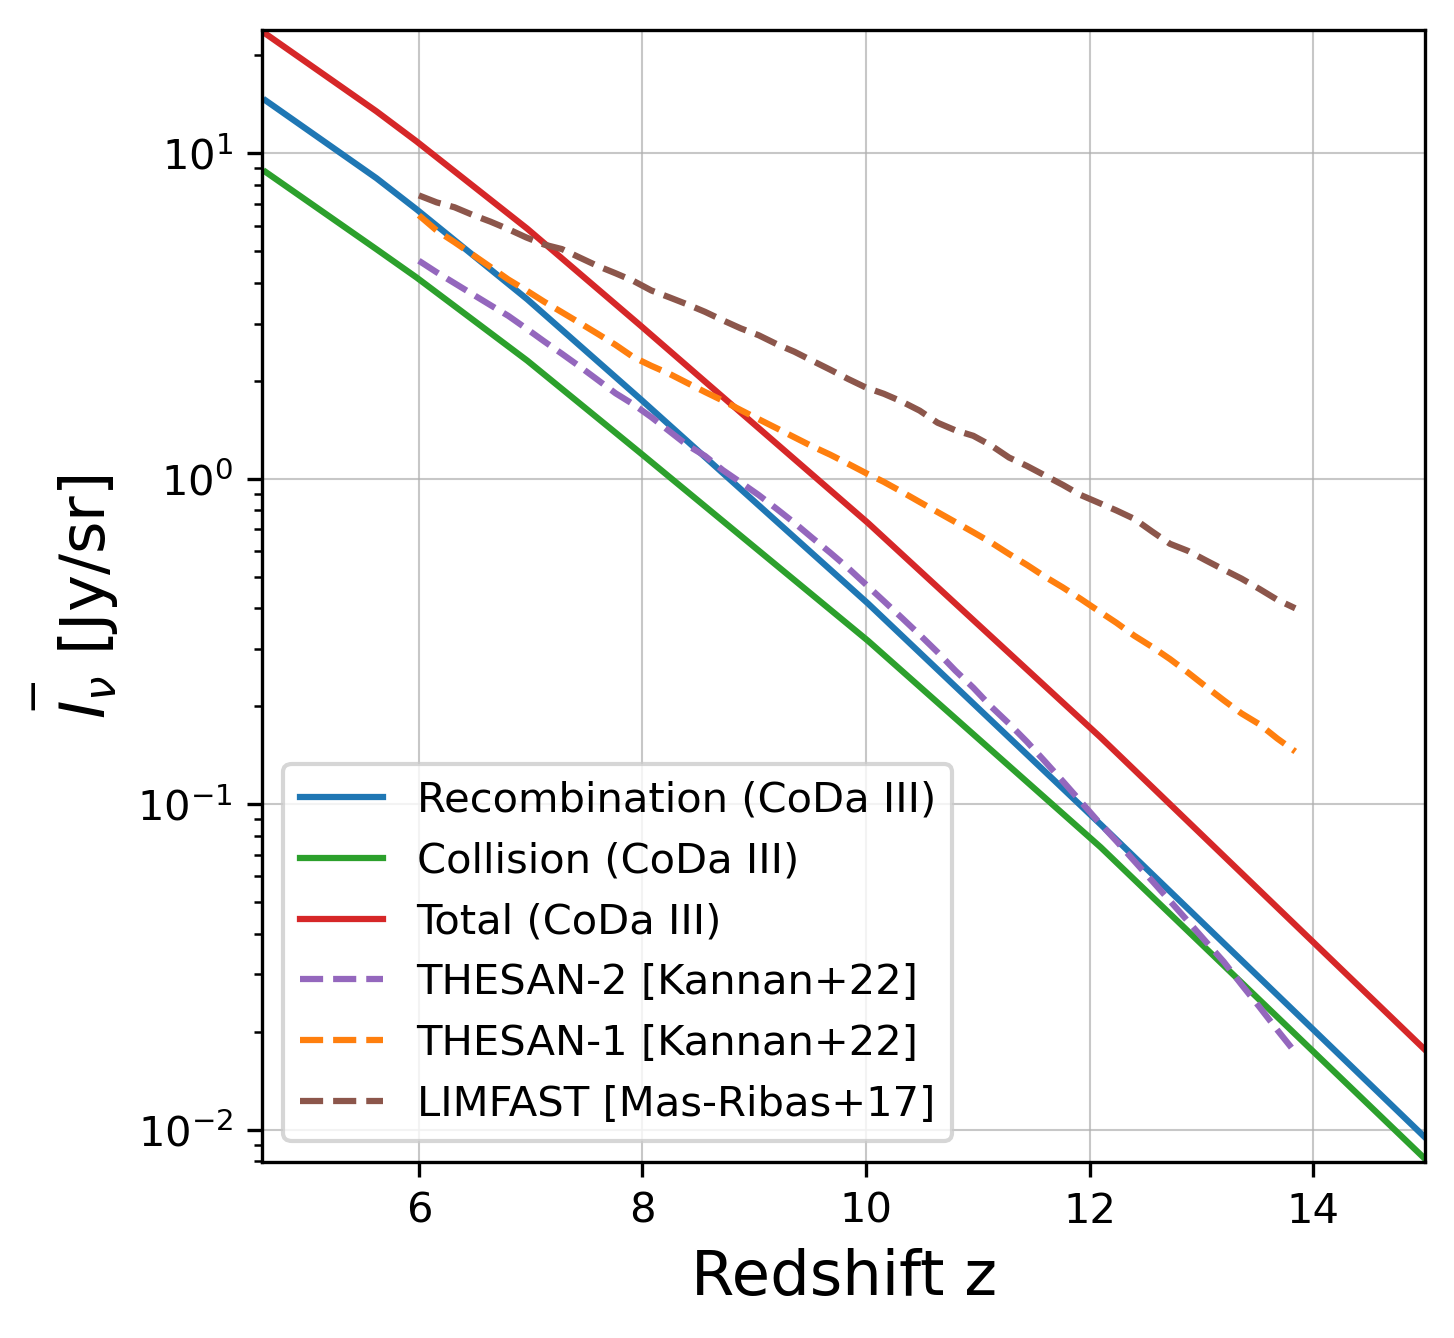

In [13]:
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.subplots()

# Define a distinctive color palette and line styles
ax.plot(RED_FINAL, I_nu_rec, linestyle='-', color='#1f77b4', label='Recombination (CoDa III)')  # Blue
ax.plot(RED_FINAL, I_nu_col, linestyle='-', color='#2ca02c', label='Collision (CoDa III)')     # Green
ax.plot(RED_FINAL, TOTAL, linestyle='-', color='#d62728', label='Total (CoDa III)')           # Red
ax.plot(TS2R, TS2i, linestyle='--', color='#9467bd', label='THESAN-2 [Kannan+22]')            # Purple
ax.plot(TS1R, TS1i, linestyle='--', color='#ff7f0e', label='THESAN-1 [Kannan+22]')            # Orange
ax.plot(LIMR, LIMi, linestyle='--', color='#8c564b', label='LIMFAST [Mas-Ribas+17]')       # Brown
#ax.plot(RED_FINAL, uniform, linestyle='--', label = 'Uniform [T=10000, rho=0.143, Xii =1]')

# Additional plot settings
ax.grid(linewidth=0.5, alpha=0.7)  # Slightly lighter grid for better visibility
ax.set_xlim(4.6, 15)
ax.set_ylim(10**-2.1, 24)
ax.legend(fontsize=10, loc='lower left', frameon=True)  # Move legend to avoid overlapping
ax.set_yscale('log')
ax.set_xlabel('Redshift z', fontsize=15)
ax.set_ylabel(r'$\overset{-}{I_{\nu}}$ [Jy/sr]', fontsize=15)

# Save as JPG
#plt.savefig('I_nu.jpg', bbox_inches='tight', dpi=300)
plt.show()

## 3.2. $I_{Hα}$ comparison extended (Wider range of redshifts for THESAN-I&II) 
1. CoDa III (z = 4.6 - 15)
2. THESAN-1 & II (z = 5.5 - 14.5)
3. LIMFAST (z = 6 - 13.8)

In [39]:
TS2_redshift = [5.541681452280201, 5.679977961868728, 5.859999999999999, 6.040058768350059, 6.219999999999999, 6.399992653956241, 
                6.580044076262544, 6.760110190656361, 6.940066114393815, 7.120044076262543, 7.299999999999997, 7.4800220381312705,
                7.6600293841750275, 7.839999999999996, 8.019977961868724, 8.200007346043755, 8.37998530791248, 8.559977961868723,
                8.739999999999995, 8.919999999999995, 9.099999999999994, 9.279999999999994, 9.459999999999994, 9.639999999999993,
                9.819999999999993, 9.999999999999993, 10.179999999999993, 10.359999999999992, 10.539999999999992, 10.719999999999992,
                10.899999999999991, 11.079999999999991, 11.259999999999991, 11.43999999999999, 11.61999999999999, 11.799999999999986,
                11.97999999999999, 12.15999999999999, 12.33999999999999, 12.519999999999989, 12.699999999999989, 12.879999999999988,
                13.059999999999988, 13.239999999999988, 13.419999999999987, 13.599999999999987, 13.779999999999987, 13.959999999999987,
                14.139999999999983, 14.319999999999986, 14.475093238640106]
TS2_intensity = [6.396304864379314, 5.862229465913773, 5.190351439972778, 4.618229870554687, 4.211065700872998, 3.8763738030886037,
                 3.549997699734947, 3.2546573939731123, 2.973114422751481, 2.6822623218755623, 2.4200416932878106, 2.19889310344834, 
                 1.9969247861303787, 1.7931422779769481, 1.5958108590134605, 1.449093418011715, 1.309357790688066, 1.1808380534519585,
                 1.0683770508886663, 0.962588013807726, 0.87163062910032, 0.7805172549963048, 0.6952242653185334, 0.6192409044292416, 
                 0.5514749510375636, 0.4804339575343303, 0.42111095065207643, 0.36481731389285654, 0.3175450219363238, 0.2771241224299881,
                 0.23992310865839284, 0.20787270631195215, 0.1800971985120159, 0.15603122858756896, 0.1332502156546867, 
                 0.11349087267630918, 0.09730128051456635, 0.08282595476696433, 0.07058429186606462, 0.06063426705477936, 
                 0.05148644007066519, 0.044031118538092454, 0.03736924695060249, 0.031680962028390075, 0.02652333277211288,
                 0.02199486032222861, 0.018437170022821872, 0.015451561268786652, 0.013094274896609501, 0.011101762196949465, 
                 0.00952138543382998]

In [40]:
TS1_redshift = [
    5.630970667451329, 5.859977961868727, 6.034692483385186, 6.2198236949498185,
    6.3998310409935755, 6.579941231649938, 6.759999999999998, 6.939999999999998,
    7.119999999999997, 7.299999999999997, 7.479999999999997, 7.659999999999997,
    7.839999999999996, 8.019999999999996, 8.199999999999996, 8.379999999999995,
    8.560088152525086, 8.739999999999995, 8.920080806481327, 9.100073460437569,
    9.279999999999994, 9.460095498568842, 9.639999999999993, 9.820146920875143,
    10.000205689225204, 10.179999999999993, 10.360168959006415, 10.540124882743868,
    10.719999999999992, 10.900066114393809, 11.079999999999991, 11.260080806481323,
    11.440161612962656, 11.61999999999999, 11.800124882743866, 11.980132228787625,
    12.16011753670011, 12.340095498568836, 12.519999999999985, 12.700066114393806,
    12.880058768350047, 13.059999999999988, 13.239977961868714, 13.419977961868714,
    13.599948577693684, 13.782503164410361, 13.959999999999987, 14.142466434191572,
    14.317269108233127, 14.478538533162382
]

TS1_intensity = [
    7.8835210535734195, 6.993909757918371, 6.34464575284192, 5.726395196327939,
    5.212382272603067, 4.716196019515191, 4.248551528243498, 3.8785132540331815,
    3.5442205804223073, 3.251949188547716, 2.9744633763027144, 2.7401898586525597,
    2.499485448108926, 2.2989252992314118, 2.1490956832670656, 2.005209745154721,
    1.8615869955487458, 1.736707201632582, 1.607656454043687, 1.4985106890537772,
    1.3995535114992244, 1.2959016193794781, 1.2126027595913642, 1.1255476474618094,
    1.0438801769782289, 0.9783905542147017, 0.8994030579103054, 0.8283753953642059,
    0.7632025445895511, 0.704024804671339, 0.6498639041582972, 0.594708334696669,
    0.5418480024038055, 0.4966903619665022, 0.45386221116642406, 0.41649765901669517,
    0.37831275524783825, 0.3420329437961206, 0.3116631896036412, 0.2804206905486734,
    0.2557226379885512, 0.22851459802891594, 0.2028606283327466, 0.18482607087641162,
    0.1658665680139396, 0.14802367420397275, 0.13316929161691846, 0.11956468242498586,
    0.10675247678964286, 0.09521313854901095
]


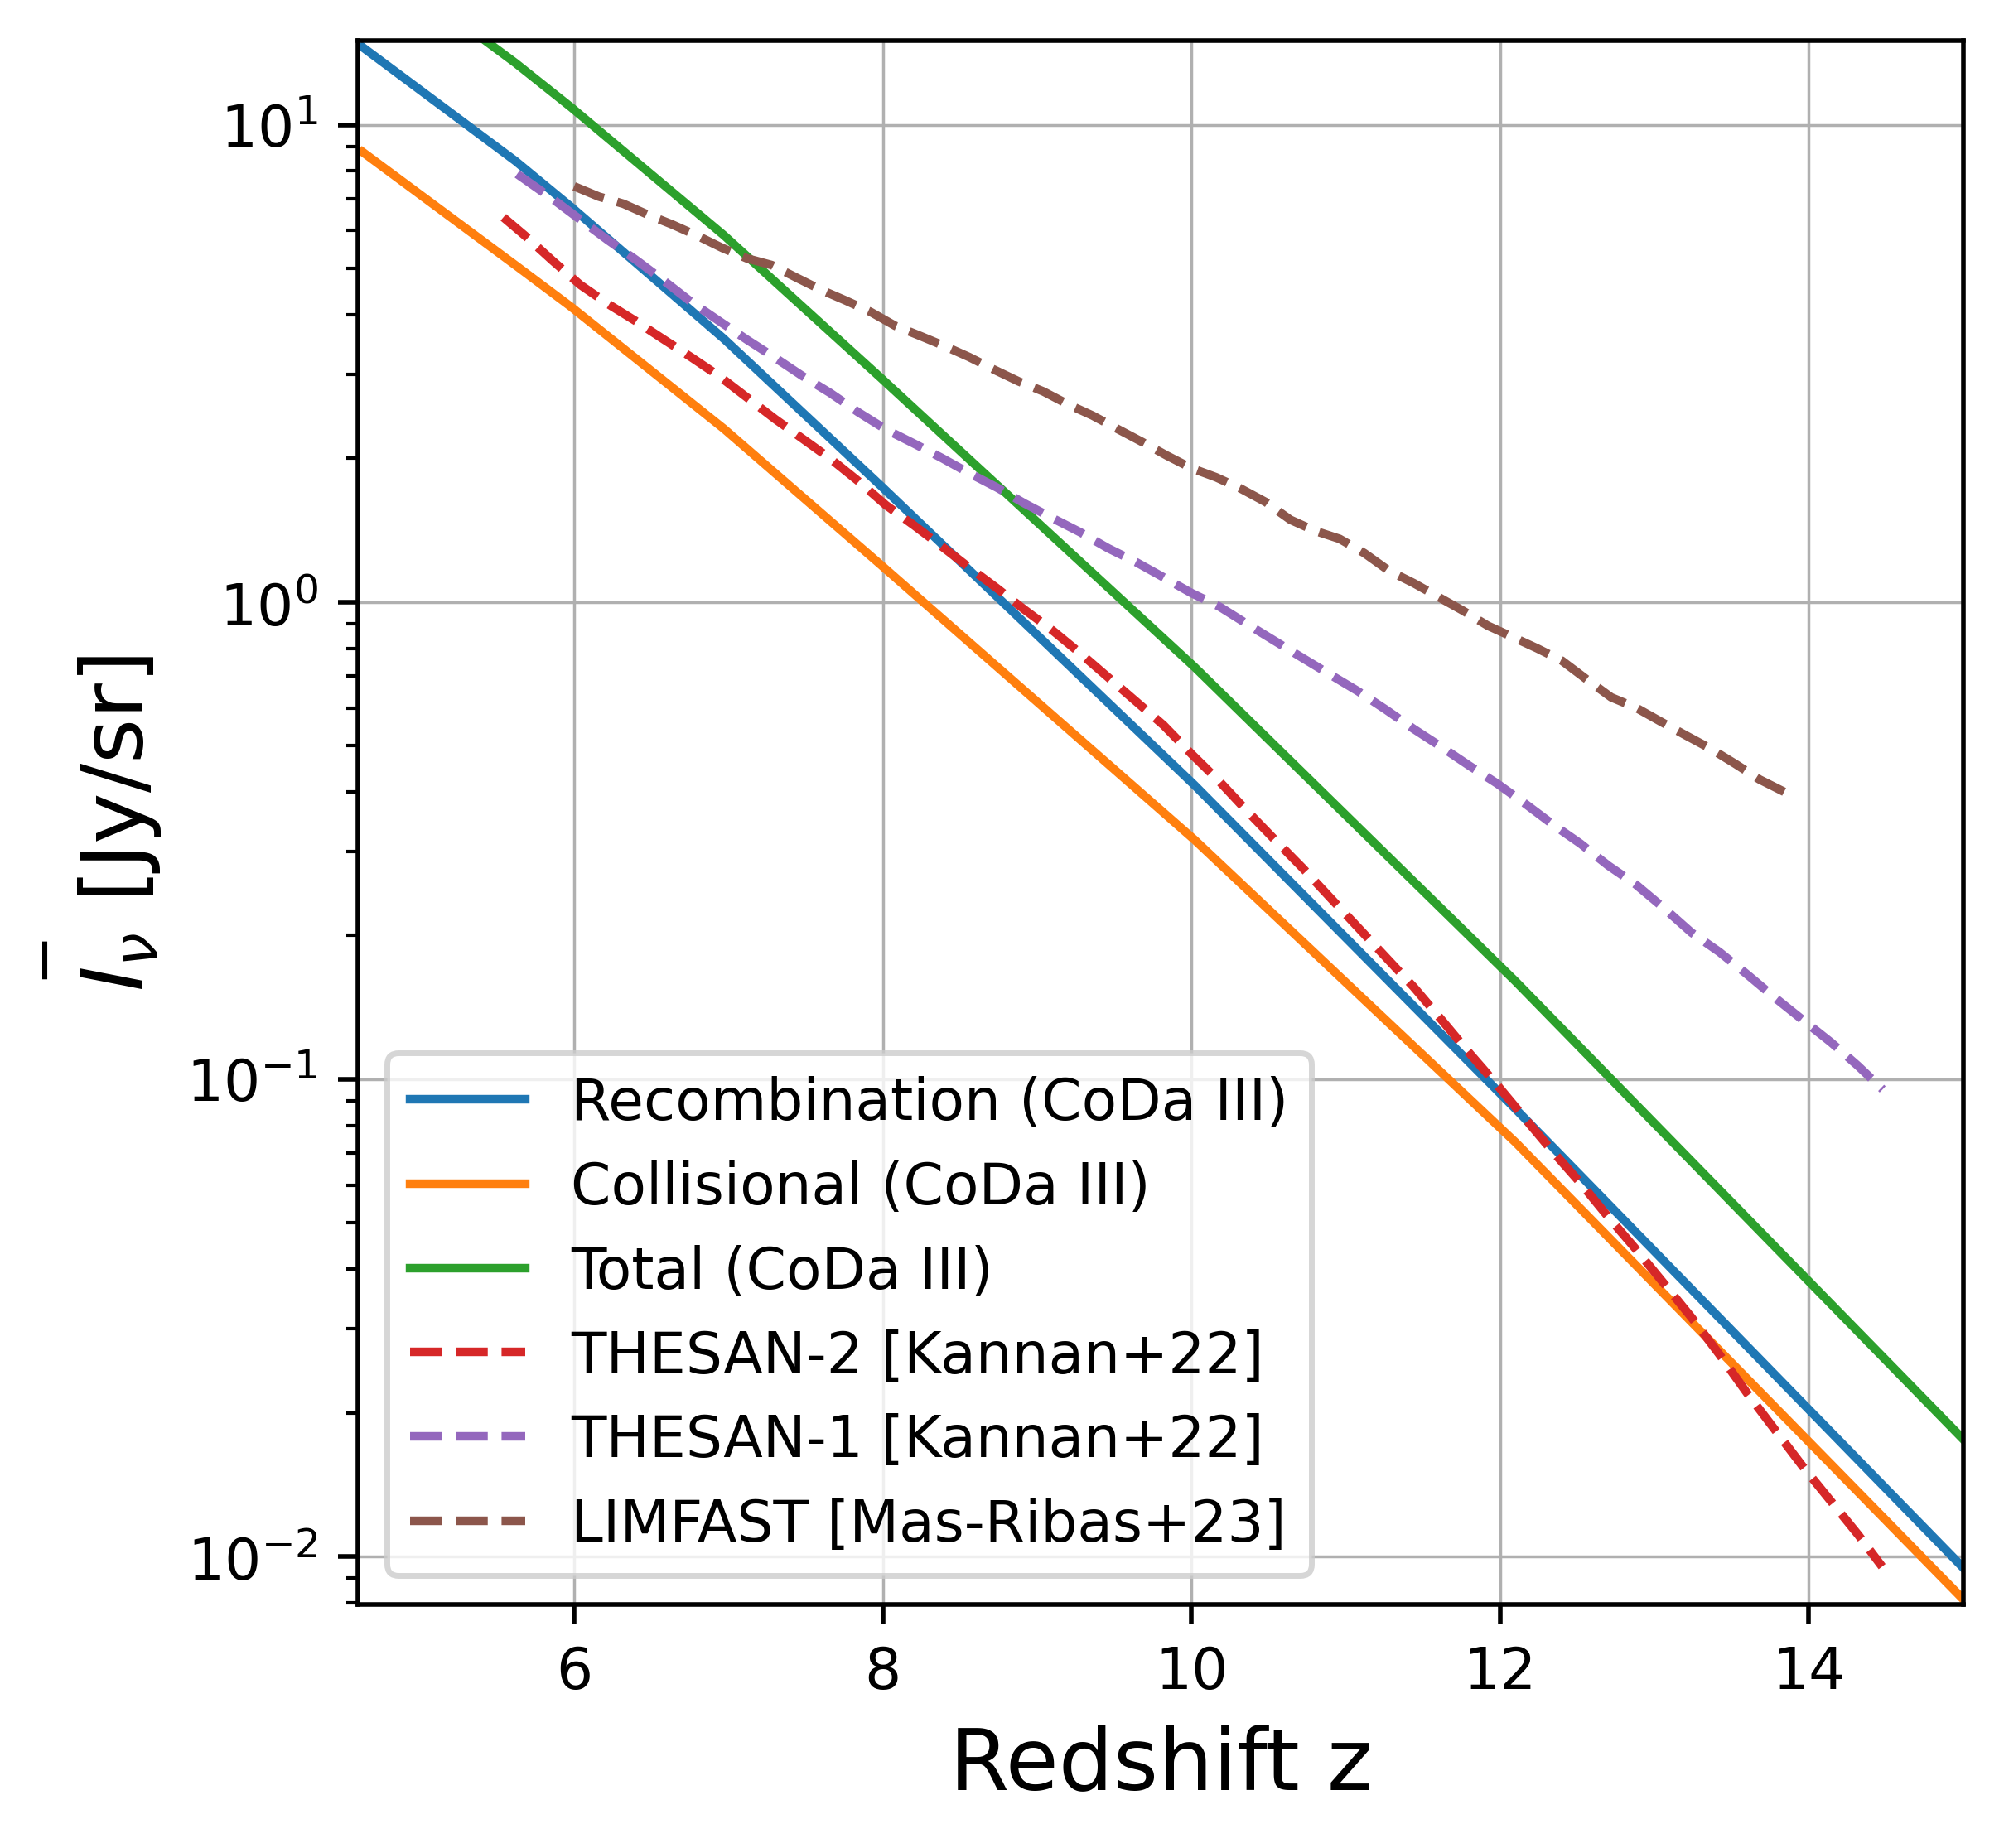

In [44]:
colors = cm.tab10.colors

fig = plt.figure(figsize=(5, 5), dpi=500)
ax = fig.subplots()

# Plot the data with the same markers but new color scheme
ax.plot(RED_FINAL, I_nu_rec, linestyle='-', color=colors[0], label='Recombination (CoDa III)')
ax.plot(RED_FINAL, I_nu_col, linestyle='-', color=colors[1], label='Collisional (CoDa III)')
ax.plot(RED_FINAL, TOTAL, linestyle='-', color=colors[2], label='Total (CoDa III)')
ax.plot(TS2_redshift, TS2_intensity, linestyle='--', color=colors[3], label='THESAN-2 [Kannan+22]')
ax.plot(TS1_redshift, TS1_intensity, linestyle='--', color=colors[4], label='THESAN-1 [Kannan+22]')
ax.plot(LIMR, LIMi, linestyle='--', color=colors[5], label='LIMFAST [Mas-Ribas+23]')
#ax.plot(RED_FINAL, uniform, color=colors[6], linestyle='--', label='Uniform [T=10000, rho=0.143, Xii=1]')

# Additional plot settings
ax.grid(linewidth=0.5)
ax.set_xlim(4.6, 15)
ax.set_ylim(10**-2.1, 15)
ax.legend(fontsize=10, loc='lower left')  # Adjust legend location and font size
ax.set_yscale('log')
ax.set_xlabel('Redshift z', fontsize=15)
ax.set_ylabel(r'$\overset{-}{I_{\nu}}$ [Jy/sr]', fontsize=15)

#plt.savefig('shapiro.jpg', bbox_inches='tight', dpi=500)
plt.show()


## 3.3. $I_{Hα}$ comparison between CoDa III recombination (Draine v.s. Raga-based recombination coefficient)

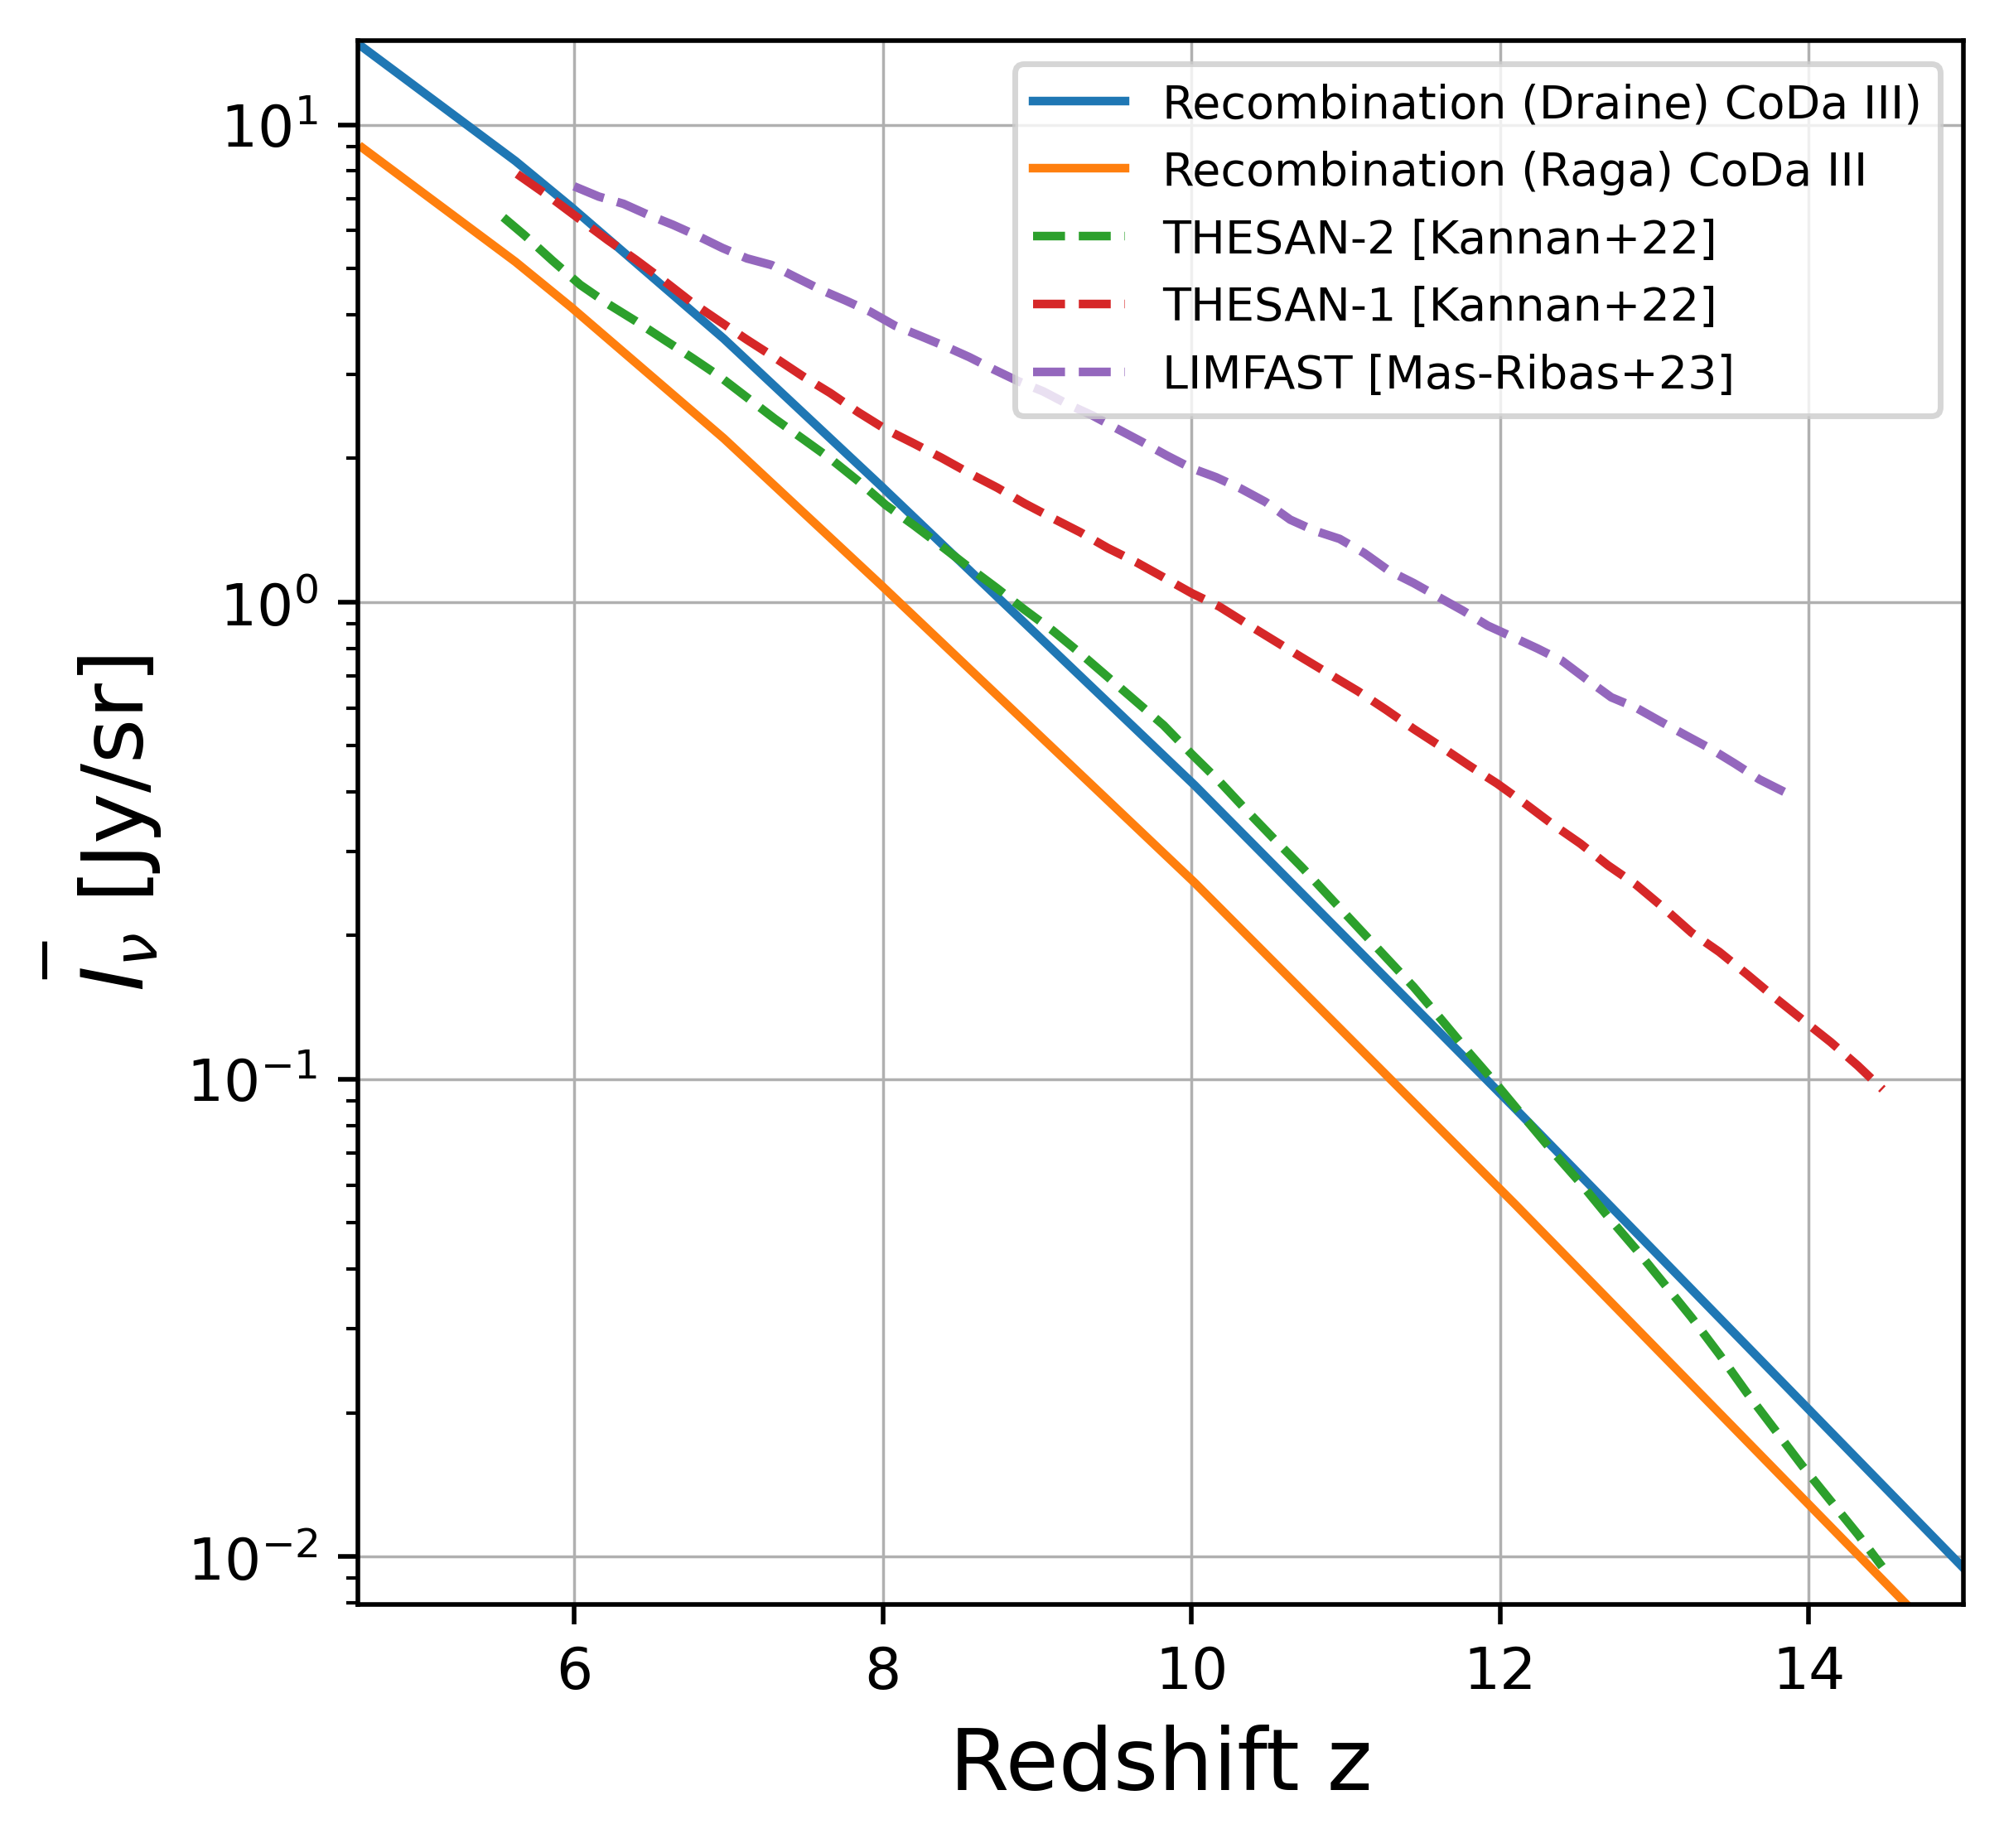

In [45]:
I_rec_raga = [8.937492757,5.161227951, 4.148550717, 2.201425314, 1.084170157, 0.2582113492, 0.05455797147, 0.006048164554]

colors = cm.tab10.colors

fig = plt.figure(figsize=(5, 5), dpi=500)
ax = fig.subplots()

# Plot the data with the same markers but new color scheme
ax.plot(RED_FINAL, I_nu_rec, linestyle='-', color=colors[0], label='Recombination (Draine) CoDa III)')
ax.plot(RED_FINAL, I_rec_raga, linestyle='-', color=colors[1], label='Recombination (Raga) CoDa III')
ax.plot(TS2_redshift, TS2_intensity, linestyle='--', color=colors[2], label='THESAN-2 [Kannan+22]')
ax.plot(TS1_redshift, TS1_intensity, linestyle='--', color=colors[3], label='THESAN-1 [Kannan+22]')
ax.plot(LIMR, LIMi, color=colors[4], linestyle = '--', label='LIMFAST [Mas-Ribas+23]')

# Additional plot settings
ax.grid(linewidth=0.5)
ax.set_xlim(4.6, 15)
ax.set_ylim(10**-2.1, 15)
ax.legend(fontsize=8, loc='upper right')  # Adjust legend location and font size
ax.set_yscale('log')
ax.set_xlabel('Redshift z', fontsize=15)
ax.set_ylabel(r'$\overset{-}{I_{\nu}}$ [Jy/sr]', fontsize=15)


# Plot the vertical line at the intersection
ax.legend(fontsize=8, loc='upper right')
# plt.savefig('I_nu_tab10_colors_intersection.jpg', bbox_inches='tight', dpi=500)
plt.show()

## 4. DM 50/100/200 Overdensity analysis 

Full data is available at the google spreadsheet (Halo/IGM cotribution)

In [46]:
DM_50_REC = np.array([0.9863108746, 0.9691178002, 0.9610393964, 0.939486769311742, 0.910694090277611, 0.830435776235919
                     ,0.714972420757433, 0.580504620715517]) *100
DM_50_COL = np.array([0.9748572632, 0.9571585562, 0.9406901764, 0.902399187602051, 0.86202418465723,
                     0.773046643186113, 0.666085193284349, 0.553805254324738])*100
DM_100_REC = np.array([0.9814501773, 0.9594255759, 0.9492986769, 0.92141999942155, 0.883471709410667,0.778697601158197,
                      0.631100498092029, 0.462800019061113])*100
DM_100_COL = np.array([0.9588229534, 0.9313248337, 0.9088777308, 0.85628165781354, 0.79908985726577,
                      0.673688452457648, 0.533700596597214, 0.400988095067218])*100
DM_200_REC = np.array([0.9733091253, 0.9460060828, 0.933911334, 0.899878695694623, 0.853320730635823,0.725869123283973,
                      0.546845813772535, 0.343082547184059])*100
DM_200_COL = np.array([0.9325811456, 0.8942197509, 0.8671925343, 0.803599316716833, 0.733667669069155,
                      0.580722889058725, 0.415030731732495, 0.266064448024347])*100

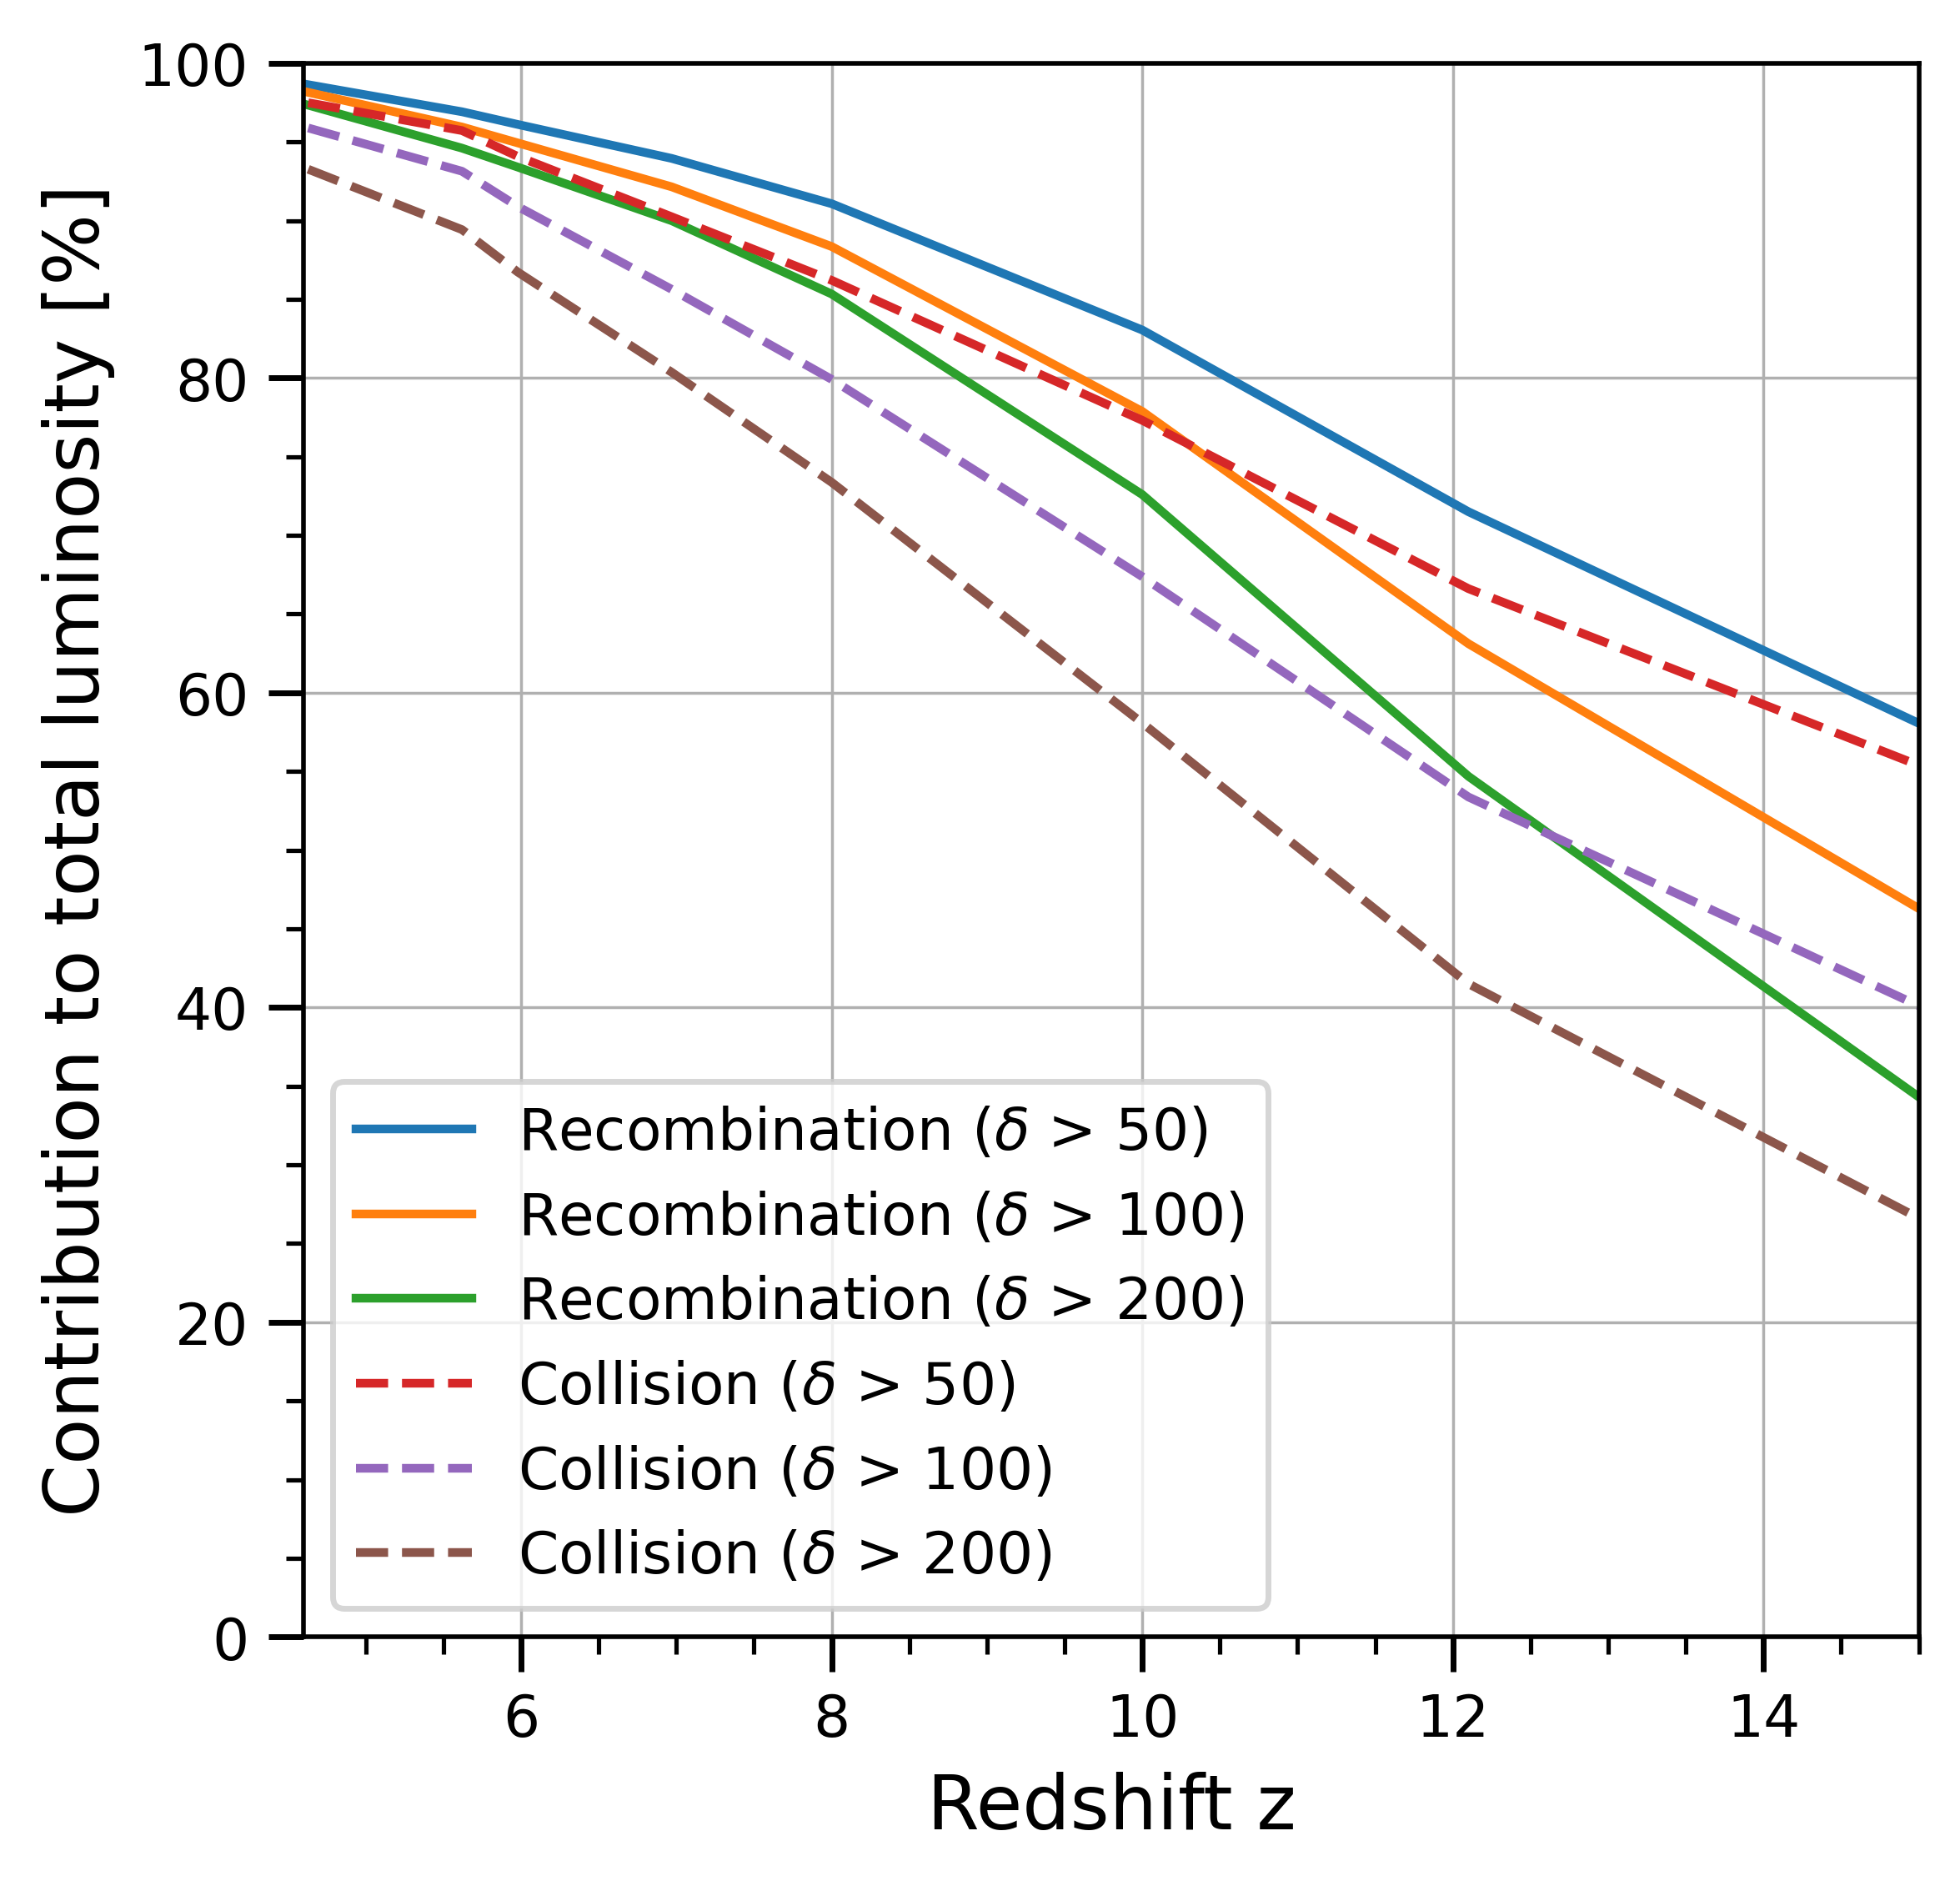

In [47]:
fig = plt.figure(figsize=(5, 5), dpi=500)
ax = fig.subplots()
ax.set_xlim(4.6, 15)
ax.set_ylim(0, 100)

# Plot the data
ax.plot(rednew, DM_50_REC, linestyle='-', label=r'Recombination ($\delta$ > 50)')
ax.plot(rednew, DM_100_REC, linestyle='-', label=r'Recombination ($\delta$ > 100)')
ax.plot(rednew, DM_200_REC, linestyle='-', label=r'Recombination ($\delta$ > 200)')
ax.plot(rednew, DM_50_COL, linestyle='--', label=r'Collision ($\delta$ > 50)')
ax.plot(rednew, DM_100_COL, linestyle='--', label=r'Collision ($\delta$ > 100)')
ax.plot(rednew, DM_200_COL, linestyle='--', label=r'Collision ($\delta$ > 200)')

# Set labels and legend
ax.set_xlabel('Redshift z', fontsize=13)
ax.set_ylabel('Contribution to total luminosity [%]', fontsize=13)

# Add grid
ax.grid(linewidth=0.5)

# Enable and configure minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator())  # Automatically places minor ticks
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Customize tick parameters
ax.tick_params(axis='both', which='major', length=6, width=1, labelsize=10)  # Major ticks
ax.tick_params(axis='both', which='minor', length=3, width=0.75, labelsize=8)  # Minor ticks

# Add legend
ax.legend()

# Save the figure
#plt.savefig('dm_example.jpg', dpi=500, quality=350, bbox_inches='tight')

plt.show()